<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Decision Trees.***

Estimated time needed: **15** minutes.

$ \ $

-------


# ***Objectives.***

After completing this lab you will be able to:

$$\color{aquamarine}{\text{Develop a classification model using Decision Tree Algorithm.}}$$

You will learn a popular machine learning algorithm called ***`Decision Trees`***. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.



$ \ $

----

## ***Table of contents.***

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#downloading_data">Downloading the Data</a></li>
        <li><a href="https://#pre-processing">Pre-processing</a></li>
        <li><a href="https://#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="https://#modeling">Modeling</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


$ \ $

-----

## ***Import libraries.***

We import the following libraries for our work.

* numpy (as np)


* pandas


* DecisionTreeClassifier from sklearn.tree


In [ ]:
import sys
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

$ \ $

-----

## ***About the dataset.***

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications:


* Drug A

* Drug B

* Drug C

* Drug X 

* Drug Y

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are:

* Age

* Sex

* Blood Pressure

* Cholesterol 

and the target is the drug that each patient responded to. It is a sample of multiclass classifier, and you can use the training part of the dataset  to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.



$ \ $

----

## ***Downloading the Data.***

To download the data, we will use pandas library to read itdirectly into a dataframe from IBM Object Storage.



In [ ]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
my_data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


$ \ $

----

## ***Practice.***

$(1)$ To begin with, we calculate the shape of our data.

In [ ]:
my_data.shape


(200, 6)

$ \ $

$(2)$ Using ***my_data***  declare the following variables: 

* $X$ as the  Feature Matrix (the data of my_data with out the info of the drug).

* $y$  as the  response vector (the feature of my_data given by drug).


In [ ]:
#(1) we remove the column containing the target name since it doesn't contain numeric values.
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

#(2) we show o the screen some results
X[0:6]


array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607]], dtype=object)

$ \ $

$(3)$ As you may figure out, some features in this dataset are categorical, such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using **pandas.get_dummies()** to convert the categorical variable into dummy/indicator variables.


In [ ]:
from sklearn import preprocessing
#help(preprocessing.LabelEncoder())


In [ ]:
#(1) creamos un codificador de etiquetas con nombre le_sex
le_sex = preprocessing.LabelEncoder()
#(1-1) encajamos (entrenamos) a nuestro objeto con las letras 'F','M' que describen el sexo de las personas de nuestra base de datos
# 'F' -> 0 y 'M' -> 1
le_sex.fit(['F','M'])
#(1-2) usamos el objeto creado anteriormente y la función transformación que cambia los datos correspondientes. En este caso, cambiamos la data de sexo que venia dada por 'F' y 'M' POR 0 Y 1.
# todos los renglones y la columna 1 (sex)
X[:,1] = le_sex.transform(X[:,1]) 


#(2) creamos un codificador de etiquetas con nombre le_BP
le_BP = preprocessing.LabelEncoder()
#(2-1) encajamos (entrenamos) a nuestro objeto con 'LOW', 'NORMAL' y 'HIGH' 
# 'LOW'-> 0, 'NORMAL'-> 1 and  'HIGH'->2
le_BP.fit(['LOW', 'NORMAL', 'HIGH'])
#(2-2) usamos el objeto creado anteriormente y la función transformación que cambia los datos correspondientes. En este caso, cambiamos la data de BP que venia dada por 'LOW', 'NORMAL', 'HIGH'  y la cambiamos por 0, 1 y 2 respectivamente
# todos los renglones y la columna 2 (BP)
X[:,2] = le_BP.transform(X[:,2])


#(3) creamos un codificador de etiquetas con nombre le_chol
le_Chol = preprocessing.LabelEncoder()
#(3-1) encajamos (entrenamos) a nuestro objeto con 'NORMAL' y 'HIGH'
le_Chol.fit([ 'NORMAL', 'HIGH'])
#(3-2) usamos el objeto creado anteriormente y la función transformación que cambia los datos correspondientes. En este caso, cambiamos la data de Cholesterol que venia dada por  'NORMAL', 'HIGH'  y la cambiamos por 0, 1  respectivamente
# todos los renglones y la columna 3 (Cholesterol)
X[:,3] = le_Chol.transform(X[:,3]) 


#(4) we show on the screen our results
X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

$ \ $

$(4)$ Now we can fill the target variable.


In [ ]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

$ \ $

$(5)$ We will be using $\color{aquamarine}{\text{(train/test) split}}$  on our <b>decision tree</b>. Let's import `train_test_split` from <b>sklearn.cross_validation</b>.
</div>


In [ ]:
from sklearn.model_selection import train_test_split

$ \ $

$(6)$ Now  `train_test_split`  will return 4 different parameters. We will name them:

* X_train

* X_test

* y_train

* y_test

The `train_test_split ` will need the parameters: 


* X: variables independientes : arreglo construido previamente

* y: variable dependiente : arreglo construido previamente
 
* test_size=0.3 : represents the ratio of the testing dataset

* random_state=3 : ensures that we obtain the same splits



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

$ \ $

$(7)$ Print the shape of ***X_trainset*** and ***y_trainset***. Ensure that the dimensions match.


In [ ]:
print(f'Shape of X training set is {X_train.shape}',' &', f' the size of Y training set is  {y_train.shape}')


Shape of X training set is (140, 5)  &  the size of Y training set is  (140,)


$ \ $

$(8)$ Print the shape of X_test and y_test. Ensure that the dimensions match.


In [ ]:
print(f'Shape of X training set is {X_test.shape}',' &', f' the size of Y training set is  {y_test.shape}')



Shape of X training set is (60, 5)  &  the size of Y training set is  (60,)


$ \ $

$(9)$ We create an instance of the `DecisionTreeClassifier` called drug_tree. Inside of the classifier, specify:

* criterion ="entropy"

* max_depth = 4

In [ ]:
drug_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drug_tree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

$ \ $

$(10)$ Next, we will `fit` the data with:

* The training feature matrix ***X_train***

* Training  response vector ***y_trainset***


In [ ]:
drug_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

$ \ $

$(11)$ Let's make some `predictions` on the testing dataset and store it into a variable called ***pred_tree***.



In [ ]:
pred_tree = drug_tree.predict(X_test)

$ \ $

$(12)$ You can print out ***pred_tree*** and ***y_test*** if you want to visually compare the predictions to the actual values.


In [ ]:
print(pred_tree[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [ ]:
print(y_test[0:5])

40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


$ \ $

$(13)$  Next, let's import metrics from sklearn and check the accuracy of our model.


In [ ]:
from sklearn import metrics

import matplotlib.pyplot as plt


In [ ]:
result = metrics.accuracy_score(y_test, pred_tree)
print("DecisionTrees's Accuracy: ", result)

DecisionTrees's Accuracy:  0.9833333333333333


$ \ $

$(14)$ The accuracy classification score computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true. In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

Let's visualize the tree


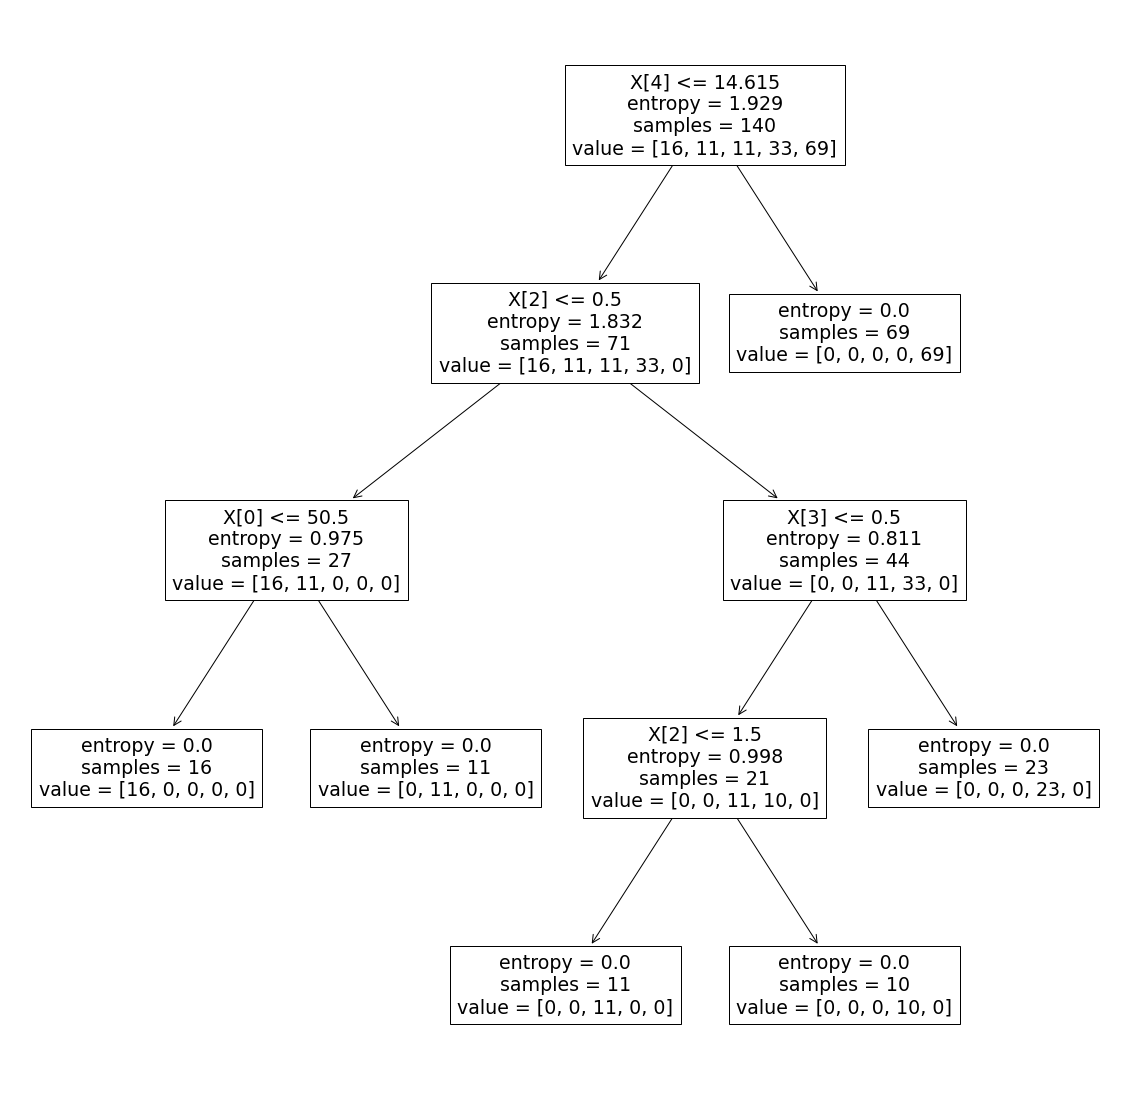

In [ ]:
#(1) configuramos el tamaño del plot
plt.figure(figsize=(20,20))

#(2) ejecutamos la función tree.plot_tree sobre drug_tree
tree.plot_tree(drug_tree)

#(3)
plt.show()